Importing some libraries that we will use for the Analysis 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandasql as ps
from sqlalchemy import create_engine
%matplotlib inline
import numpy as np
np.set_printoptions(threshold=np.nan)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
import seaborn as sns
from sklearn.metrics import f1_score

/Users/raj/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Load the data from file and Display the first five rows of the table using the "head" Command

In [3]:
data = pd.read_csv("data_viz_full.csv")
data.head(5)

,national_provider_identifier,gender,birth_year,medical_group,hospital,location,school,graduation_year,pharmacy_preference,popularity,channel,content,week_of,day,time_sent,response
0,10000000,0,1972,NYU,NYU Langone,10016,Stanford,2000,1,2,0,0,4/1/18,1,Morning,0
1,10000000,0,1972,NYU,NYU Langone,10016,Stanford,2000,1,2,2,0,4/1/18,3,Afternoon,0
2,10000000,0,1972,NYU,NYU Langone,10016,Stanford,2000,1,2,0,0,4/1/18,4,Afternoon,0
3,10000000,0,1972,NYU,NYU Langone,10016,Stanford,2000,1,2,2,0,4/8/18,2,Evening,0
4,10000000,0,1972,NYU,NYU Langone,10016,Stanford,2000,1,2,0,2,4/8/18,4,Morning,1


Making Some Changes related to Anomalies in tha data for the Time_Sent Field

In [4]:
#Make some changes to the wrongly spelled words
for i in range (0, len(data.time_sent)):
    if(data.time_sent[i] == 'Aftenoon' or data.time_sent[i] == 'Aternoon'):
        data.time_sent[i] = 'Afternoon'

/Users/raj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Converting the Birth-Year to age in relation with the Current year and then consolidating them into 8 different Bins

In [5]:


#Getting age from birth year
age = 2018 - data.birth_year
data['age'] = age


#Creating age range and converting the to categorical Variable 
age_range = []
for i in range(0, len(age)):
    if(age[i] > 20 and age[i] <= 25):
        age_range.append(1)
    elif(age[i] > 25 and age[i] <= 30):
        age_range.append(2)
    
    elif(age[i] > 30 and age[i] <= 35):
        age_range.append(3)
   
    elif(age[i] > 35 and age[i] <= 40):
        age_range.append(4)
    
    elif(age[i] > 40 and age[i] <= 45):
        age_range.append(5)
    
    elif(age[i] > 45 and age[i] <= 50):
        age_range.append(6)
    
    elif(age[i] > 50 and age[i] <= 55):
        age_range.append(7) 
    else:
        age_range.append(8)
    
    
data['age_range'] = age_range


Converting the Time_sent variable from String to categorical for our Analysis

In [6]:
#Converting the variable from string to categorical
time_sent_bin = []
for i in range (0, len(data.time_sent)):
    if(data.time_sent[i] == 'Morning'):
        time_sent_bin.append(1) 
    elif(data.time_sent[i] == 'Afternoon'):
        time_sent_bin.append(2)
    else:
        time_sent_bin.append(3)
        
data['time_sent_bin'] = time_sent_bin

Converting the week_of variable to Categorical with Making the first week of month as 1, the second week as 2 and so on 

In [7]:
data['week_of_bin'] = 0
for i in range(0, len(data.week_of)):
    if(data.week_of[i] == '4/1/18' or data.week_of[i] == '5/6/18' or data.week_of[i] == '5/3/18' or 
       data.week_of[i] == '6/3/18' or data.week_of[i] == '6/6/18'):
        data.week_of_bin[i] = 1
    elif(data.week_of[i] == '4/8/18' or data.week_of[i] == '5/13/18' or data.week_of[i] == '6/10/18'):
        data.week_of_bin[i] = 2
    elif(data.week_of[i] == '4/15/18' or data.week_of[i] == '5/20/18' or data.week_of[i] == '6/17/18'):
        data.week_of_bin[i] = 3
    elif(data.week_of[i] == '4/22/18' or data.week_of[i] == '5/27/18' 
         or data.week_of[i] == '6/24/18' or data.week_of[i] == '5/29/18'):
        data.week_of_bin[i] = 4
    elif(data.week_of[i] == '4/29/18'):
        data.week_of_bin[i] = 5      

/Users/raj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/raj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/raj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/raj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCo

Mapping different schools to numbers thus converting them into categorical variables for future Analysis

In [8]:
count = 0
data['school_bin'] = 0
for i in (data.school.unique()):
    temp = np.where(i == np.array(data.school))[0]
    data.school_bin[temp] = count
    count = count + 1

/Users/raj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [9]:
# data.gender = data.gender + 1
# data.channel = data.channel + 1
# data.content = data.content + 1

Using SQL to divide the data into Train and Test sets. 
We keep the last two weeks from our data as Test sets which brings the Train Data size to 1506 and Test to 270 rows

In [10]:
#Creating the training set
train = """SELECT * FROM data where week_of != '6/17/18' and week_of != '6/24/18'"""
data_train = ps.sqldf(train, locals())

In [11]:
#Creating the test set
test = """SELECT * FROM data where week_of = '6/17/18' or week_of = '6/24/18'"""
data_test = ps.sqldf(test, locals())

Now we select the features that we want to carry our Analysis on and segragate the features and prediction Variables from both the training and test data

In [12]:
#Selecting the features and getting the response column separately for train
xname = ['gender', 'location', 'school_bin', 'popularity', 'age_range', 'channel', 'content', 'week_of_bin', 'day', 'time_sent_bin']
X_train = np.array(data_train[xname].values)
y_train = np.array(data_train['response'].values)

In [13]:
#Selecting the features and getting the response column separately for test
X_test = np.array(data_test[xname].values)
y_test = np.array(data_test['response'].values)

Now in this section we run our <b>"Random Forest Model"</b>.<br>
We do our model selection process by running 20 models with each model having trees ranging from 1-20.<br>
We do 10 fold cross validation and check the accuracy of each model.<br>
The parameters that we use for the model are:<br>
1. <b>n_estimators</b> - Number of estimators(number of trees) to be used in the model<br>
2. <b>criterion</b> - The criterion that should be used to create the split point. Includes <b>"Gini Index"</b> or <b>"Entropy"</b><br>
3. <b>Max_features</b> - The number of features to consider when looking for the best split<br>
4. <b>min_samples_split</b> - The minimum number of samples required to split an internal node<br>
5. <b>min_samples_leaf</b> - The minimum number of samples required at the leaf<br>
6. <b>min_weight_fraction_leaf</b> - The minimum weighted fraction of the sum total 
   of weights (of all the input samples) required to be at a leaf node<br>
7. <b>n_jobs</b> - Number of jobs to be run in parallel<br>
8. <b>random_state</b> - random_state is the seed used by the random number generator<br>

For more information on the <b>"RandomForestClassifier"</b> of the sklearn package please refer the following link:<br>
<a>http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html</a> <br>
    
We use the <b>"cross_val_score"</b> function of the sklearn to calculate the accuracy of each model 
and store it in a variable for further reference.<br>
The inputs to this function we use include:<br>
1. estimator - the model whose accuracy need to be evaluated<br>
2. X - The data to fit the model to<br>
3. y - The target variable we want to predict<br>
4. cv - Determines the cross-validation splitting strategy<br>

For further information please refer the link below:<br>
<a>http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html</a>




In [14]:
#Getting accuracy scores from different n_estimators in random forest
score_accuracy = []
n_trees_accuracy = []
for i in range(1, 21):
    est = RandomForestClassifier(n_estimators = i, 
                                 criterion = "entropy",
                                 max_features = "auto",
                                 max_depth=None,
                                 min_samples_split = 2,
                                 min_samples_leaf = 1,
                                 min_weight_fraction_leaf = 0,
                                 max_leaf_nodes = None,
                                 n_jobs = 1,
                                 random_state = 8)
    n_trees_accuracy.append(i)
    validation = cross_val_score(est, X_train, y_train, cv = 10)
    score_accuracy.append(validation)
    

Taking the mean of accuracy values of each model since we carried out <b>10 fold cross-Validation</b>.<br>
Carrying out 10 fold cross-validation will make each model run 10 times with <b>different sets of training and test</b> each time 
So we take mean of all 10 runs of all models to get the final mean accuracy for that model.<br>
For more information on <b>k-fold cross-validation technique</b> and how to select the value of k and its advantages,
please refer the link below:<br>
<a>https://machinelearningmastery.com/k-fold-cross-validation/</a>

In [15]:
#Getting mean of accuracy scores for each random forest model
#By comparing this with the F-score we can show how just seeing accuracy can be mis-leading
score_accuracy_arr = np.asarray(score_accuracy)
score_accuracy_arr_mean = np.mean(score_accuracy_arr, axis = 1)

Plotting the mean accuracy of each model.<br>
We can see that the mean accuracy of the model with <b>2</b> eastimators is the highest with a values of about <b>65%</b>

Text(0,0.5,'Accuracy')

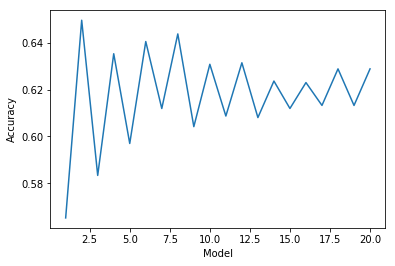

In [17]:
plt.plot(n_trees_accuracy, score_accuracy_arr_mean)
plt.xlabel('Model')
plt.ylabel('Accuracy')

Let us reinforce our model selection decision of considering <b>2</b> estimators by looking at the box-plot
for each model(since each model is run 10 times).<br>
Looking at the box plot we can conclude that model with <b>2</b> trees gives us the highest accuracy.

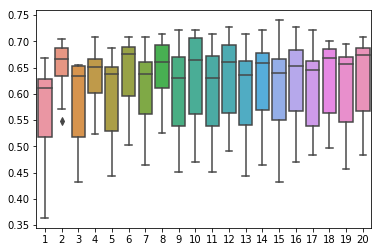

In [18]:
sns.boxplot(n_trees_accuracy, score_accuracy)

Let us analyze further as to how our model has performed on <b>test data in terms of prediction</b>, by studying the <b>confusion matrix</b>
for the model with <b>2</b> parameters.<br>
We first train our model with n_estimators = 2 and fitting the model

In [19]:
est = RandomForestClassifier(n_estimators = 2, 
                                 criterion = "entropy",
                                 max_features = "auto",
                                 max_depth=None,
                                 min_samples_split = 2,
                                 min_samples_leaf = 1,
                                 min_weight_fraction_leaf = 0,
                                 max_leaf_nodes = None,
                                 n_jobs = 1,
                                 random_state = 8)
#Fitting the model on training data
est.fit(X_train, y_train)

#Making predictions on the training data
y_pred = est.predict(X_test)

Looking at the matrix below, we can infer that even when the accuracy of the model is around <b>67%</b>, the model does not 
perform well on the minority class. It seems that accuracy is not the apt parameter here to evaluate our model.<br>
Let us look at the <b>f-score</b> to evaluate the model selection process.

In [20]:
confusion_matrix(y_test, y_pred)

array([[169,  17],
       [ 70,  14]])

In this part we carry out the same process as before we did for the accuracy, but now evaluating the scoring on 
<b>f-score</b>. <br>
We run 20 model with 10-fold cross validation and then take mean for 10 folds for each model.

In [22]:
#Getting F scores from different n_estimators in random forest
score_fscore = []
n_trees_fscore = []
for i in range(1, 21):
    est = RandomForestClassifier(n_estimators = i, 
                                 criterion = "entropy",
                                 max_features = "auto",
                                 max_depth=None,
                                 min_samples_split = 2,
                                 min_samples_leaf = 1,
                                 min_weight_fraction_leaf = 0,
                                 max_leaf_nodes = None,
                                 n_jobs = 1,
                                 random_state = 8)
    n_trees_fscore.append(i)
    validation = cross_val_score(est, X_train, y_train, cv = 10, scoring = 'f1')
    score_fscore.append(validation)

In [23]:
#Getting mean of F scores for each random forest model
score_fscore_arr = np.asarray(score_fscore)
score_fscore_arr_mean = np.mean(score_fscore_arr, axis = 1)

Looking at the box-plot again we infer model with 3-estimators(3-trees) have the highest f-score and hence should be
selected for further analysis

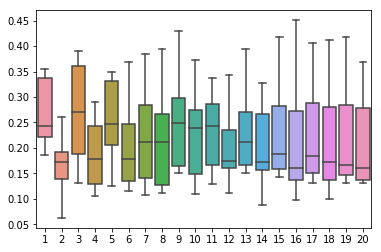

In [19]:
sns.boxplot(n_trees_fscore, score_fscore)

Getting the optimal n-estimator value that we use use for further analysis(3 in our case)

In [27]:
#Getting the optimal n-estimator value
sorted_array = np.sort(score_fscore_arr_mean)
max_2 = sorted_array[len(sorted_array) - 2]
n_estimator_max_fscore = np.where(score_fscore_arr_mean == max_2)[0]
n_estimator = n_estimator_max_fscore[0]

Below function <b><i>perf_measure()</i></b> will take in inputs the data, y_actual(true values) and y_pred(model Predicted Values) and return the indivisual elements of a confusion matrix <b>True Positive, True Negative, False Positive and False Negative</b>. Along with this it also returns all the elements of the confusion matrix segmented for each channel.<br>
<b>The purpose of doing this is elaborated in the next section</b>

In [28]:
#Function that will give all elements of the confusion matrix and distribution of channels within each element of the 
#Confusion matrix
def perf_measure(data, y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    TP_email = 0
    TP_dm = 0
    TP_rep_call = 0
    FP_email = 0
    FP_dm = 0
    FP_rep_call = 0
    TN_email = 0
    TN_dm = 0
    TN_rep_call = 0
    FN_email = 0
    FN_dm = 0
    FN_rep_call = 0
    TP_prom = []
    FP_prom = []
    TN_prom = []
    FN_prom = []

    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
            TP += 1
            if ((data[i])[5]) == 1:
                TP_email += 1
            elif ((data[i])[5]) == 2:
                TP_dm += 1
            else:
                TP_rep_call += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
            FP += 1
    
            if ((data[i])[5]) == 1:
                FP_email += 1
            elif ((data[i])[5]) == 2:
                FP_dm += 1
            else:
                FP_rep_call += 1
        if y_actual[i]==y_pred[i]==0:
            TN += 1
            
            if ((data[i])[5]) == 1:
                TN_email += 1
            elif ((data[i])[5]) == 2:
                TN_dm += 1
            else:
                TN_rep_call += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
            FN += 1
            
            if ((data[i])[5]) == 1:
                FN_email += 1
            elif ((data[i])[5]) == 2:
                FN_dm += 1
            else:
                FN_rep_call += 1
       
    TP_prom.append(TP_email)
    TP_prom.append(TP_dm)
    TP_prom.append(TP_rep_call)
    
    FP_prom.append(FP_email)
    FP_prom.append(FP_dm)
    FP_prom.append(FP_rep_call)
    
    TN_prom.append(TN_email)
    TN_prom.append(TN_dm)
    TN_prom.append(TN_rep_call)
    
    FN_prom.append(FN_email)
    FN_prom.append(FN_dm)
    FN_prom.append(FN_rep_call)
    
    
    

    return(TP, FP, TN, FN, TP_prom, FP_prom, TN_prom, FN_prom)

The process by which random forest model make decisions in a classification problem is called
a voting process. The way it works is, each tree in the random forest gives its prediction and then
these decisions are collected and put through voting where maximum number of votes for a particular 
<b>class(Class would represent the target variable values, as in our case the model predicts if the HCP will 
respond to a promotion or not)</b> wins and is the prediction by the model.<br>
Each tree in the model gives out a probability as to what is its prediction confidence for a class.<br>
Now decision of a tree to predict a particular class is based on the <b><i>Threshold</i></b> value.<br>
<b>Threshold</b> can be any value between <b>0 and 1</b>, using which the tree will give out a prediction for 
a particular class.<br>
For Example, if the threshold value is set to 0.4 and we want all trees that give out predictions to predict as 
<b>response</b> for a value above 0.4 and <b>no response</b> for a value below 0.4.<br><br>

To evaluate the correct threshold value for our model, we use a process of automation where we run the model with 
3-estimators(as we evaluated using the model selection process before), with 80 values from 0-0.9 and check to see which value of threshold gives the highest <b>f-score</b>. This is one way in which we can select a threshold value.<br><br>
Another approach is evaluating the threshold based on the <b>Return on Investment<i>(ROI)</i></b>.<br>
Assuming the costs to be <b>0.1 C/email, \$5/direct Mail, \$275/Rep call and $150,000 gained per HCP for a response</b>, 
based on the numbers obtained from the function <b><i>perf_measure()</i></b> above we calculate the ROI and select the threshold with highest ROI.<br>
For the purpose of our model, we use the second approach to make selection of threshold. This is because, we want to maximize our profits.



In [29]:
#Get the F-score and costing for different value of thresholds from 0.1-0.9 for the optimal n-estimator Value
#COSTINGS
# 0.1 C/email
# $5/direct_mail
# $275/Rep call
# $150,000 gained per HCP for a response
costing = []
# This function returns the predicted values by a model based on the cut-off value
def cutoff_predict(est, X, cutoff):
    return (est.predict_proba(X)[:, 1] > cutoff).astype(int)


def cutoff_predict_new(est, X, cutoff, y):
    est.fit(X, y)
    return (est.predict_proba(X)[:, 1] > cutoff).astype(int)

# Custom f-score function that calculates values for different cutoff values
def custom_f1(cutoff):
    def f1_cutoff(est, X, y):
        y_pred = cutoff_predict(est, X, cutoff)
        return f1_score(y, y_pred)
    return f1_cutoff
score_max_fscore = []
cutoff_value = []
for cutoff in np.arange(0.1, 0.9, 0.01):
    est = RandomForestClassifier(n_estimators = n_estimator + 1, 
                                 criterion = "entropy",
                                 max_features = "auto",
                                 max_depth=None,
                                 min_samples_split = 2,
                                 min_samples_leaf = 1,
                                 min_weight_fraction_leaf = 0,
                                 max_leaf_nodes = None,
                                 n_jobs = 1,
                                 random_state = 8)
    cutoff_value.append(cutoff)
    #f-score calculation
    validation = cross_val_score(est, X_train, y_train, cv = 10, scoring = custom_f1(cutoff))
    score_max_fscore.append(validation)
    
    
    #ROI Calculations
    TP, FP, TN, FN, TP_prom, FP_prom, TN_prom, FN_prom = perf_measure(X_train, y_train, 
                                                        y_pred = cutoff_predict_new(est, X_train, cutoff, y_train))
    promotion_no_return = (FP_prom[0] * 0.1) + (FP_prom[1] * 5) + (FP_prom[2] * 275)
    opportunity_cost = (FN * 150000) - ((FN_prom[0] * 0.1) + (FN_prom[1] * 5) + (FN_prom[2] * 275))
    promotion_saved = (TN_prom[0] * 0.1) + (TN_prom[1] * 5) + (TN_prom[2] * 275)
    promotion_benefit = (TP * 150000) - ((TP_prom[0] * 0.1) + (TP_prom[1] * 5) + (TP_prom[2] * 275))
    
    profit = promotion_saved  + promotion_benefit - promotion_no_return - opportunity_cost
    costing.append(profit)
    
    

Calculating the mean of the f-score values for each model since we performed 10-fold cross validation

In [30]:
score_max_fscore_arr = np.asarray(score_max_fscore)
score_max_fscore_arr_mean = np.mean(score_max_fscore_arr, axis = 1)

Getting the threshold with maximum value of ROI

In [57]:
costing_max = np.where(costing == np.max(costing))[0]
threshold_costing = []
threshold_costing.append(np.arange(0.1, 0.9, 0.01)[costing_max])
threshold = np.max(threshold_costing)

<b>Building the model on the final parameters determined with the processes above</b>

In [59]:
est = RandomForestClassifier(n_estimators = n_estimator + 1, 
                                 criterion = "entropy",
                                 max_features = "auto",
                                 max_depth=None,
                                 min_samples_split = 2,
                                 min_samples_leaf = 1,
                                 min_weight_fraction_leaf = 0,
                                 max_leaf_nodes = None,
                                 n_jobs = 1,
                                 random_state = 8)

In [60]:
est.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0, n_estimators=3, n_jobs=1,
            oob_score=False, random_state=8, verbose=0, warm_start=False)

In [61]:
y_pred = (est.predict_proba(X_test)[:, 1] > threshold).astype(int)

Thus we can see that we have quite a balance in the predictions made by our model as compared to earlier,
when we performed model selection based only on accuracy. Here, we get a decreased accuracy of <b>52% but maximized profits</b>

In [62]:
confusion_matrix(y_test, y_pred)

array([[89, 97],
       [34, 50]])